In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('DATA/hearing_test.csv')

In [10]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [11]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [12]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

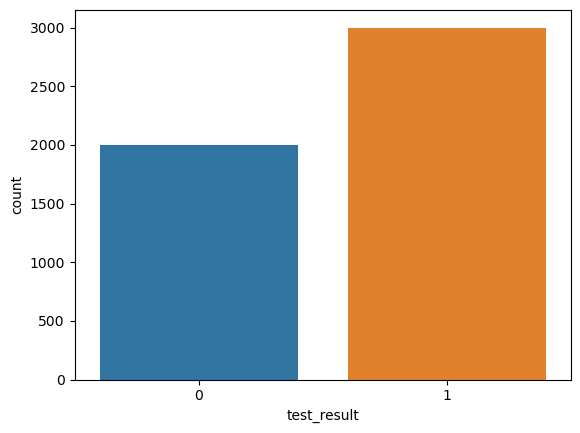

In [17]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

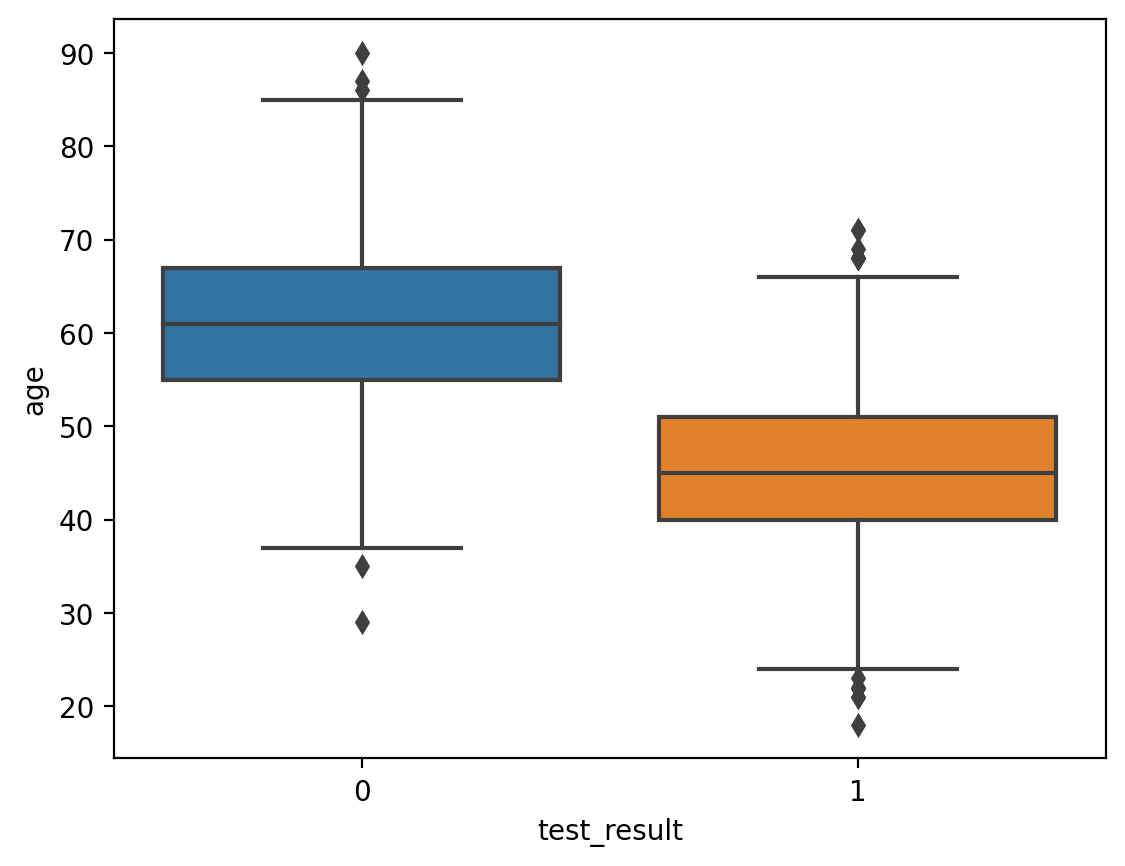

In [19]:
plt.figure(dpi=200)
sns.boxplot(x='test_result', y='age', data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

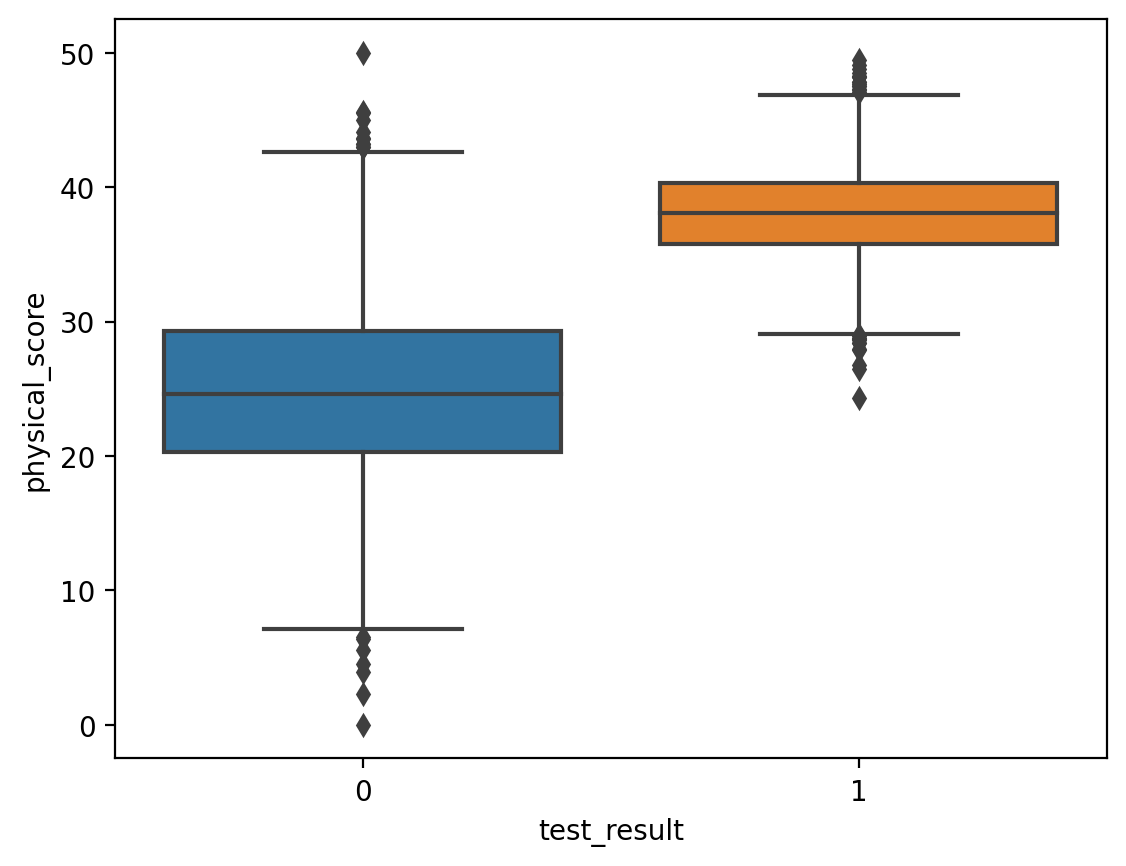

In [21]:
plt.figure(dpi=200)
sns.boxplot(x='test_result', y='physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

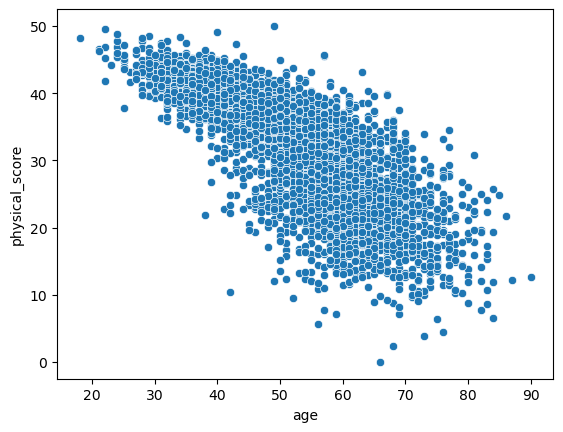

In [22]:
sns.scatterplot(x='age', y='physical_score', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

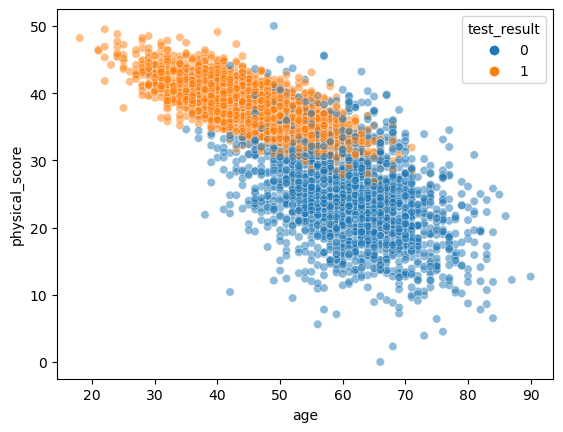

In [29]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

C:\Users\HP\anaconda3\envs\requirements\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


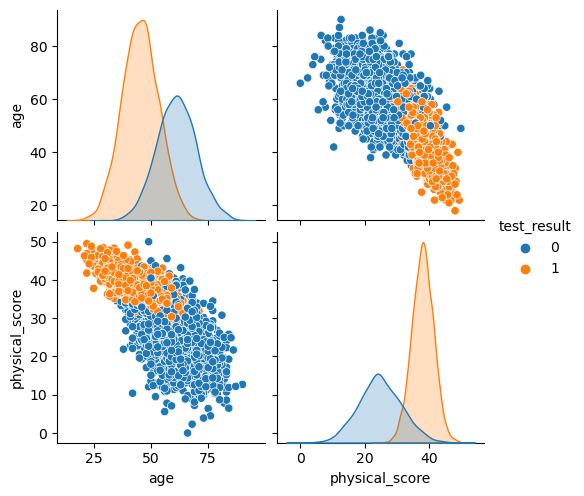

In [30]:
sns.pairplot(df, hue='test_result')

<Axes: >

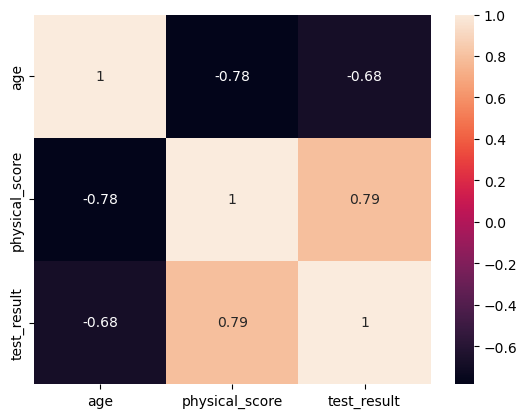

In [31]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

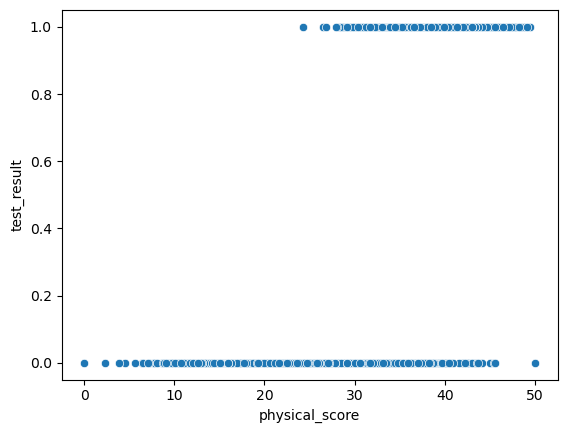

In [32]:
sns.scatterplot(x= 'physical_score', y='test_result', data=df)

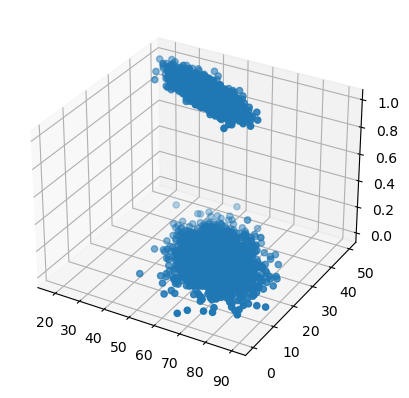

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], marker= 'o')

In [39]:
X = df.drop('test_result', axis=1)

In [40]:
y = df['test_result']

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [47]:
scaler = StandardScaler()

In [48]:
scaled_X_train = scaler.fit_transform(X_train)

In [49]:
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression()

In [53]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [54]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [57]:
y_pred = log_model.predict_proba(scaled_X_test)

In [58]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [61]:
y_pred = log_model.predict(scaled_X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.93

In [64]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

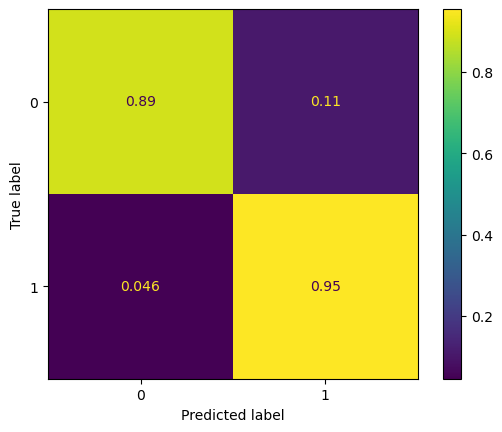

In [69]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='true')

In [70]:
len(y_test)

500

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [73]:
from sklearn.metrics import precision_score, recall_score

In [74]:
precision_score(y_test, y_pred)

0.9331210191082803

In [75]:
recall_score(y_test, y_pred)

0.9543973941368078

In [81]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

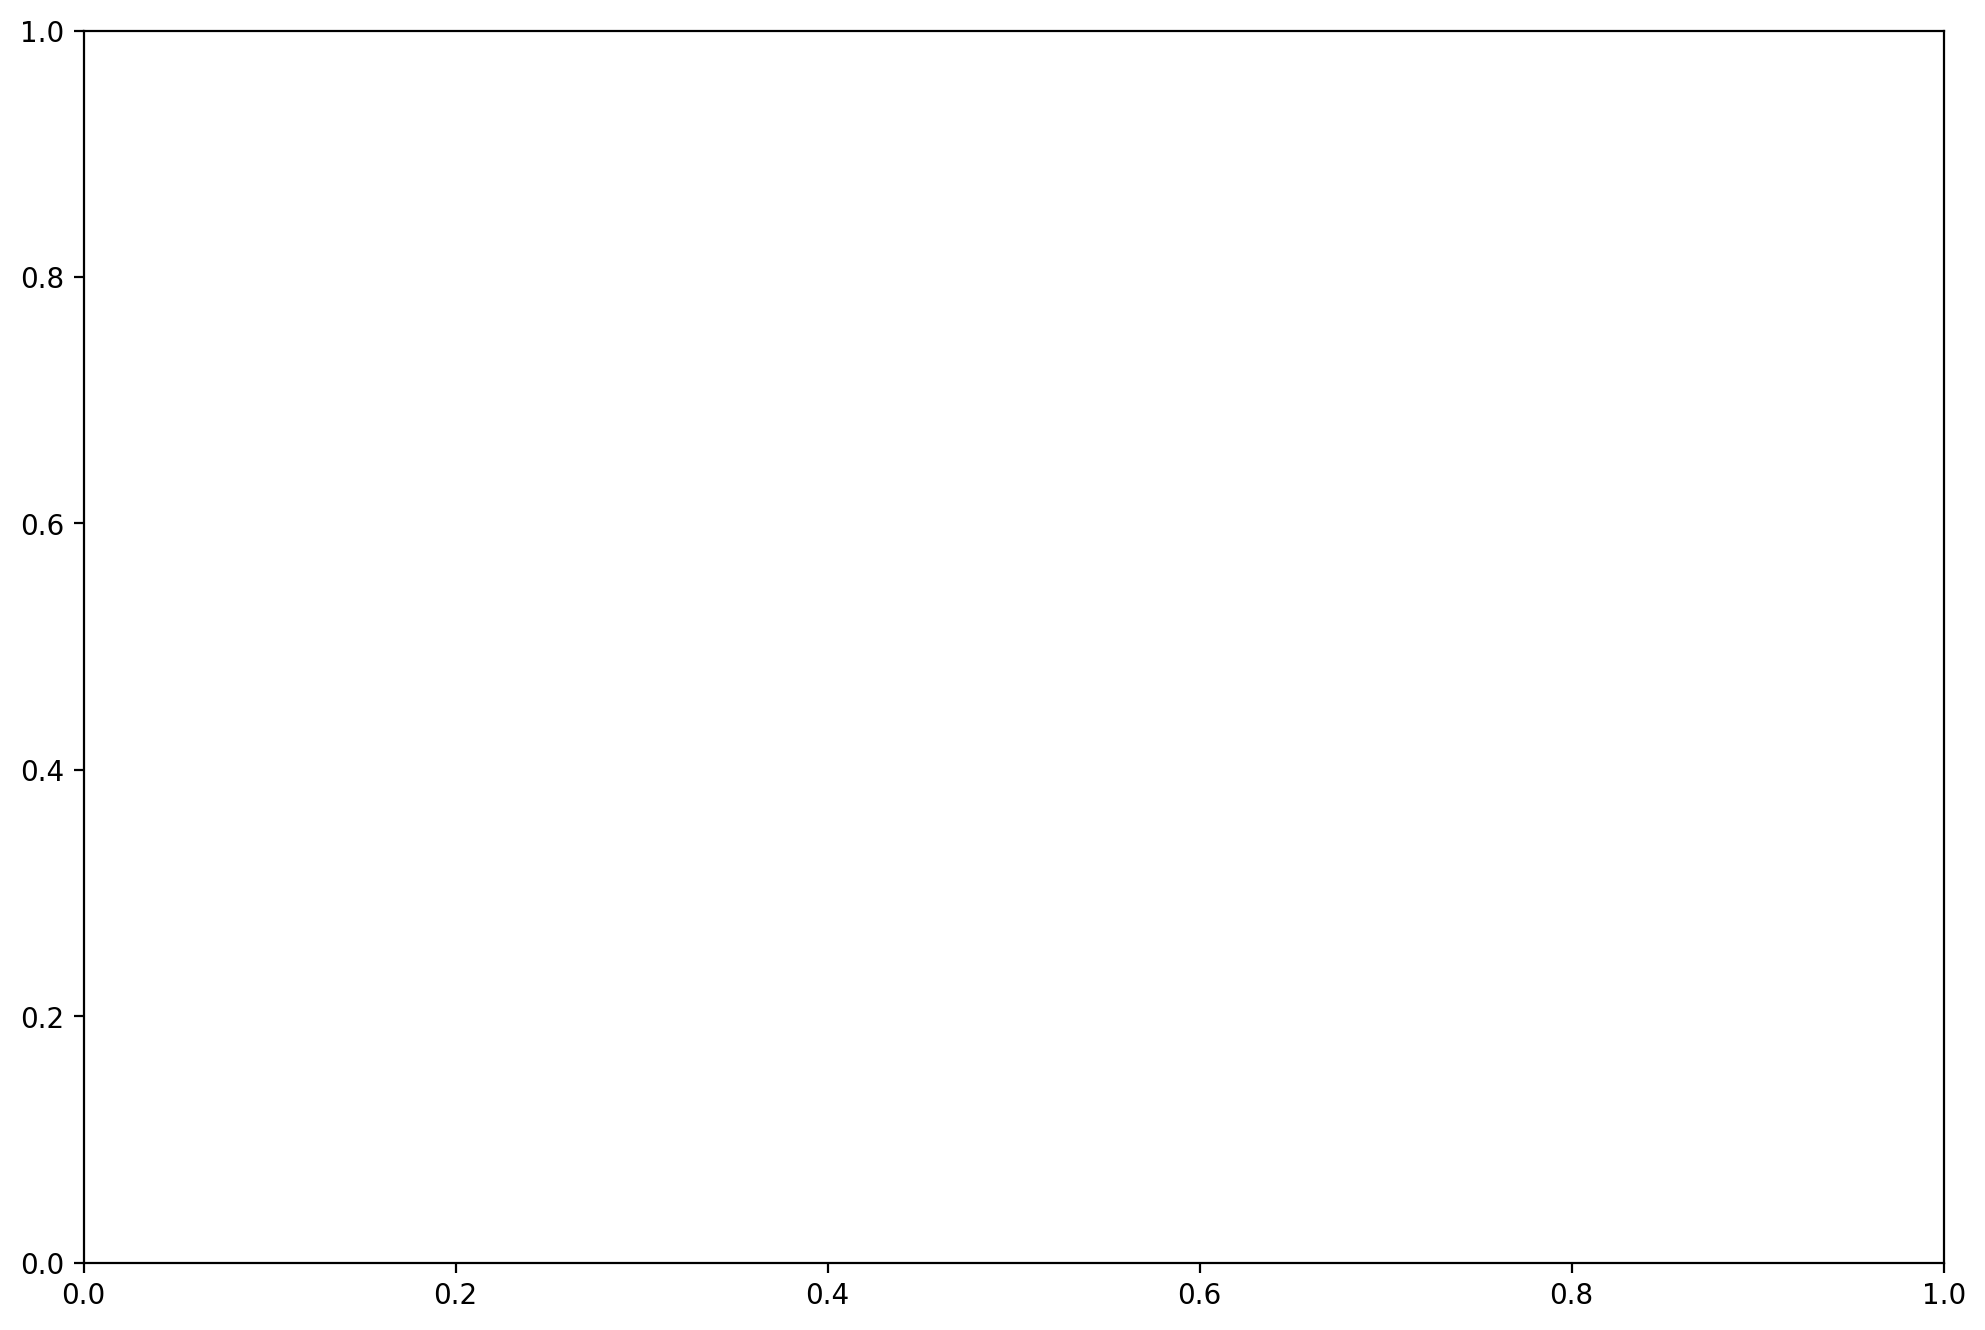

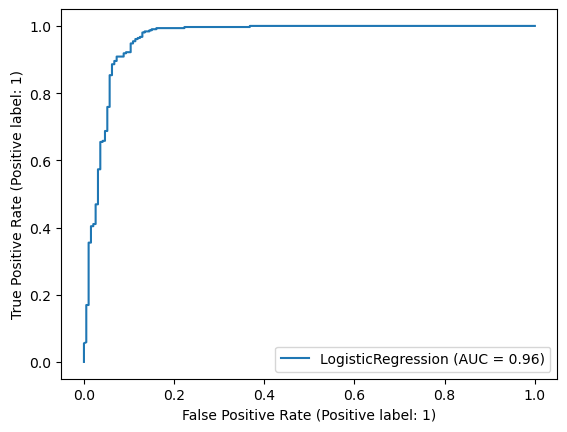

In [82]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

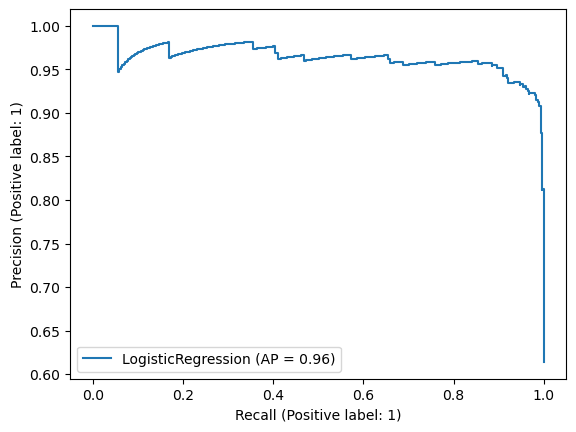

In [83]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [84]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [85]:
y_test[0]

1